# Data Import

In [124]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [36]:
import pandas as pd

df_data = pd.read_csv('movie_data.csv', header=0, sep=',', quotechar='"')

In [37]:
df_data.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [38]:
df_data.loc[df_data['sentiment'].isna()].count()

review       0
sentiment    0
dtype: int64

In [39]:
df_data.loc[df_data['review'].isna()].count()

review       0
sentiment    0
dtype: int64

In [40]:
len(df_data['review'].unique())

49582

In [41]:
df_data = df_data.drop_duplicates(keep='first')

In [42]:
print(df_data.count)

<bound method DataFrame.count of                                                   review  sentiment
0      In 1974, the teenager Martha Moxley (Maggie Gr...          1
1      OK... so... I really like Kris Kristofferson a...          0
2      ***SPOILER*** Do not read this, if you think a...          0
3      hi for all the people who have seen this wonde...          1
4      I recently bought the DVD, forgetting just how...          0
...                                                  ...        ...
49995  OK, lets start with the best. the building. al...          0
49996  The British 'heritage film' industry is out of...          0
49997  I don't even know where to begin on this one. ...          0
49998  Richard Tyler is a little boy who is scared of...          0
49999  I waited long to watch this movie. Also becaus...          1

[49582 rows x 2 columns]>


In [43]:
df_data.loc[df_data['sentiment']==1].count()

review       24884
sentiment    24884
dtype: int64

In [44]:
df_data.loc[df_data['sentiment']==0].count()

review       24698
sentiment    24698
dtype: int64

In [45]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

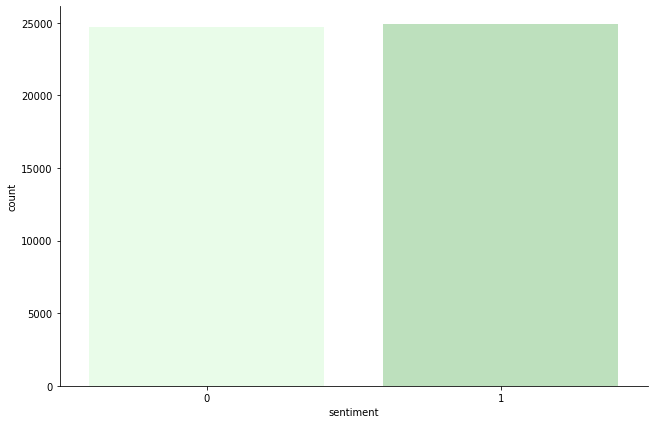

In [46]:
sns.catplot(x="sentiment", data=df_data, kind="count", height=6, aspect=1.5, palette=sns.light_palette("green"))
#plt.show();
plt.savefig("posnegmovies.png", dpi=300, quality=100)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data['review'], df_data['sentiment'], test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# Data Preprocessing
- removing punctuation
- removing special characters
- removing stopwords
- stemming

In [48]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juliy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
import re
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('<[^>]*>', '', text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    text = re.sub(REPLACE_BY_SPACE_RE, " ", text)
    text = re.sub('\d+', '', text)
    text = re.sub(BAD_SYMBOLS_RE,"",text)
    text = ' '.join([word for word in text.split() if word not in STOPWORDS])
    
    return text

In [50]:
X_train = [text_prepare(x) for x in X_train]
X_val = [text_prepare(x) for x in X_val]
X_test = [text_prepare(x) for x in X_test]

In [51]:
X_train[:3]

['approximately second thomas edison produced short see annabelle moore performing loie fuller choreographed serpentine dance two different fantastical flowing robes moore one bigger stars late victorian era featured number edison company shorts including one among first kinetoscope films shown london loie fuller actually patented serpentine dance moore performs robes well entire frames frequently hand tinted film presaging one common symbolic devices silent era supposedly moore films popular enough frequently redone including refilming version available us may later version remake moore became even popular rumored would appear naked private party restaurant new york city later went star gibson bathing girl ziegfeld follies appeared short notable framing motion especially second half becomes almost abstract somewhat resembles morris louis painting even though almost years louis relevant work able find short dvd number different anthologies early films',
 'makes low budget production on

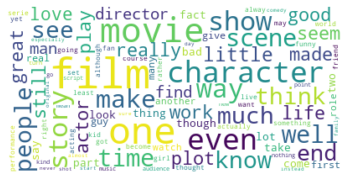

In [52]:
text = " ".join(review for review in X_train)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.show();
plt.savefig('wordcloud_movies.png', dpi=300, quality=100)

In [53]:
from nltk.stem.porter import PorterStemmer

def text_stemming(text):
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in text.split()]) 

In [54]:
X_train = [text_stemming(x) for x in X_train]
X_val = [text_stemming(x) for x in X_val]
X_test = [text_stemming(x) for x in X_test]

In [55]:
X_train[:3]

['approxim second thoma edison produc short see annabel moor perform loie fuller choreograph serpentin danc two differ fantast flow robe moor one bigger star late victorian era featur number edison compani short includ one among first kinetoscop film shown london loie fuller actual patent serpentin danc moor perform robe well entir frame frequent hand tint film presag one common symbol devic silent era supposedli moor film popular enough frequent redon includ refilm version avail us may later version remak moor becam even popular rumor would appear nake privat parti restaur new york citi later went star gibson bath girl ziegfeld folli appear short notabl frame motion especi second half becom almost abstract somewhat resembl morri loui paint even though almost year loui relev work abl find short dvd number differ antholog earli film',
 'make low budget product one favorit movi kid watch alreadi time get tire tender melancholia throughout whole thing similar classic like niagara think lo

# Feature Extraction
- Bag of words
- TF-IDF

# Bag of Words
- 1-2-gram
- 1-gram
- 2-gram

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer(min_df=3,max_df=0.9, ngram_range=(1, 2))

X_train_bow12 = cvect.fit_transform(X_train)
X_val_bow12 = cvect.transform(X_val)
X_test_bow12 = cvect.transform(X_test)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer(min_df=3,max_df=0.9, ngram_range=(1, 1))

X_train_bow1 = cvect.fit_transform(X_train)
X_val_bow1 = cvect.transform(X_val)
X_test_bow1 = cvect.transform(X_test)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer(min_df=3,max_df=0.9, ngram_range=(2, 2))

X_train_bow2 = cvect.fit_transform(X_train)
X_val_bow2 = cvect.transform(X_val)
X_test_bow2 = cvect.transform(X_test)

# TF-IDF
- 1-2-gram
- 1-gram
- 2-gram

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=3, max_df=0.9,ngram_range=(1,2), token_pattern='(\S+)')

X_train_tfidf12 = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf12 = tfidf_vectorizer.transform(X_val)
X_test_tfidf12 = tfidf_vectorizer.transform(X_test)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=3, max_df=0.9,ngram_range=(1,1), token_pattern='(\S+)')

X_train_tfidf1 = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf1 = tfidf_vectorizer.transform(X_val)
X_test_tfidf1 = tfidf_vectorizer.transform(X_test)

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=3, max_df=0.9,ngram_range=(2,2), token_pattern='(\S+)')

X_train_tfidf2 = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf2 = tfidf_vectorizer.transform(X_val)
X_test_tfidf2 = tfidf_vectorizer.transform(X_test)

# Evaluation

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix


In [63]:
def print_evaluation_scores(y_val, predicted):
    
    print('Accuracy:', accuracy_score(y_val, predicted))
    print('F1 score (micro):',f1_score(y_val,predicted, average='micro'))
    print('F1 score: (micro)',f1_score(y_val,predicted, average='macro'))
    print('F1 score (weighted):',f1_score(y_val,predicted, average='weighted'))
    print('Average precision (micro):',average_precision_score(y_val,predicted, average='micro'))
    print('Average precision (micro):',average_precision_score(y_val,predicted,average='macro'))
    print('Average precision (weighted):',average_precision_score(y_val,predicted,average='weighted'))

# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegressionCV

def train_lr_clf(X_train, y_train):
    lr = LogisticRegressionCV(cv=5, n_jobs=-1, max_iter=10000)
    lr.fit(X_train, y_train)
    return lr

In [65]:
lr_clf_bow12 = train_lr_clf(X_train_bow12, y_train)
lr_clf_bow1 = train_lr_clf(X_train_bow1, y_train)
lr_clf_bow2 = train_lr_clf(X_train_bow2, y_train)

In [66]:
lr_clf_tfidf12 = train_lr_clf(X_train_tfidf12, y_train)
lr_clf_tfidf1 = train_lr_clf(X_train_tfidf1, y_train)
lr_clf_tfidf2 = train_lr_clf(X_train_tfidf2, y_train)

In [67]:
y_val_predicted_lr_bow12 = lr_clf_bow12.predict(X_val_bow12)
y_val_predicted_lr_tfidf12 = lr_clf_tfidf12.predict(X_val_tfidf12)

In [68]:
y_val_predicted_lr_bow1 = lr_clf_bow1.predict(X_val_bow1)
y_val_predicted_lr_tfidf1 = lr_clf_tfidf1.predict(X_val_tfidf1)

In [69]:
y_val_predicted_lr_bow2 = lr_clf_bow2.predict(X_val_bow2)
y_val_predicted_lr_tfidf2 = lr_clf_tfidf2.predict(X_val_tfidf2)

In [70]:
print('Bag-of-words lr 1,2gram')
print_evaluation_scores(y_val, y_val_predicted_lr_bow12)
print('Tfidf lr 1,2 gram')
print_evaluation_scores(y_val, y_val_predicted_lr_tfidf12)

Bag-of-words lr 1,2gram
Accuracy: 0.8917011192901079
F1 score (micro): 0.8917011192901078
F1 score: (micro) 0.891676666189879
F1 score (weighted): 0.8916735480093129
Average precision (micro): 0.8438938603752297
Average precision (micro): 0.8438938603752297
Average precision (weighted): 0.8438938603752297
Tfidf lr 1,2 gram
Accuracy: 0.898053846929515
F1 score (micro): 0.898053846929515
F1 score: (micro) 0.898020250097623
F1 score (weighted): 0.8980167037653676
Average precision (micro): 0.8510227317129058
Average precision (micro): 0.8510227317129058
Average precision (weighted): 0.8510227317129058


In [71]:
print('Bag-of-words lr 1gram')
print_evaluation_scores(y_val, y_val_predicted_lr_bow1)
print('Tfidf lr 1gram')
print_evaluation_scores(y_val, y_val_predicted_lr_tfidf1)

Bag-of-words lr 1gram
Accuracy: 0.8882726631037612
F1 score (micro): 0.8882726631037612
F1 score: (micro) 0.888250072655521
F1 score (weighted): 0.8882470285525667
Average precision (micro): 0.8398104653628686
Average precision (micro): 0.8398104653628686
Average precision (weighted): 0.8398104653628686
Tfidf lr 1gram
Accuracy: 0.8935161843299385
F1 score (micro): 0.8935161843299385
F1 score: (micro) 0.8934881113050068
F1 score (weighted): 0.8934847983393317
Average precision (micro): 0.8458363418066374
Average precision (micro): 0.8458363418066374
Average precision (weighted): 0.8458363418066374


In [72]:
print('Bag-of-words lr 2gram')
print_evaluation_scores(y_val, y_val_predicted_lr_bow2)
print('Tfidf lr 2gram')
print_evaluation_scores(y_val, y_val_predicted_lr_tfidf2)

Bag-of-words lr 2gram
Accuracy: 0.8551981446001815
F1 score (micro): 0.8551981446001815
F1 score: (micro) 0.855165449393544
F1 score (weighted): 0.8551612802061204
Average precision (micro): 0.7991699519765529
Average precision (micro): 0.7991699519765529
Average precision (weighted): 0.7991699519765529
Tfidf lr 2gram
Accuracy: 0.8652818392659071
F1 score (micro): 0.865281839265907
F1 score: (micro) 0.8652445354166385
F1 score (weighted): 0.8652402398218741
Average precision (micro): 0.8108658330332639
Average precision (micro): 0.8108658330332639
Average precision (weighted): 0.8108658330332639


# Naive Bayes Classifier

In [73]:
from sklearn.naive_bayes import MultinomialNB

def train_nb_clf(X_train, y_train):
    nb_clf = MultinomialNB()
    nb_clf.fit(X_train, y_train)
    return nb_clf

In [74]:
nb_clf_bow12 = train_nb_clf(X_train_bow12, y_train)
nb_clf_tfidf12 = train_nb_clf(X_train_tfidf12, y_train)

In [75]:
nb_clf_bow1 = train_nb_clf(X_train_bow1, y_train)
nb_clf_tfidf1 = train_nb_clf(X_train_tfidf1, y_train)

In [76]:
nb_clf_bow2 = train_nb_clf(X_train_bow2, y_train)
nb_clf_tfidf2 = train_nb_clf(X_train_tfidf2, y_train)

In [77]:
y_val_predicted_nb_bow12 = nb_clf_bow12.predict(X_val_bow12)
y_val_predicted_nb_tfidf12 = nb_clf_tfidf12.predict(X_val_tfidf12)

In [78]:
y_val_predicted_nb_bow1 = nb_clf_bow1.predict(X_val_bow1)
y_val_predicted_nb_tfidf1 = nb_clf_tfidf1.predict(X_val_tfidf1)

In [79]:
y_val_predicted_nb_bow2 = nb_clf_bow2.predict(X_val_bow2)
y_val_predicted_nb_tfidf2 = nb_clf_tfidf2.predict(X_val_tfidf2)

In [80]:
print('Bag-of-words NB 1,2gram')
print_evaluation_scores(y_val, y_val_predicted_nb_bow12)
print('Tfidf NB 1,2gram')
print_evaluation_scores(y_val, y_val_predicted_nb_tfidf12)

Bag-of-words NB 1,2gram
Accuracy: 0.869617827972169
F1 score (micro): 0.869617827972169
F1 score: (micro) 0.8696177802455967
F1 score (weighted): 0.8696179313797422
Average precision (micro): 0.8206348386834619
Average precision (micro): 0.8206348386834619
Average precision (weighted): 0.8206348386834619
Tfidf NB 1,2gram
Accuracy: 0.8775839467580921
F1 score (micro): 0.8775839467580921
F1 score: (micro) 0.8775702219894056
F1 score (weighted): 0.8775677384598338
Average precision (micro): 0.8274807121527077
Average precision (micro): 0.8274807121527077
Average precision (weighted): 0.8274807121527077


In [81]:
print('Bag-of-words NB 1gram')
print_evaluation_scores(y_val, y_val_predicted_nb_bow1)
print('Tfidf NB 1gram')
print_evaluation_scores(y_val, y_val_predicted_nb_tfidf1)

Bag-of-words NB 1gram
Accuracy: 0.8501562972673188
F1 score (micro): 0.8501562972673188
F1 score: (micro) 0.8501233660356726
F1 score (weighted): 0.8501276224533684
Average precision (micro): 0.8004361997723004
Average precision (micro): 0.8004361997723004
Average precision (weighted): 0.8004361997723004
Tfidf NB 1gram
Accuracy: 0.8568115357466976
F1 score (micro): 0.8568115357466976
F1 score: (micro) 0.8568104743489731
F1 score (weighted): 0.8568112212584831
Average precision (micro): 0.8054543499983033
Average precision (micro): 0.8054543499983033
Average precision (weighted): 0.8054543499983033


In [82]:
print('Bag-of-words NB 2gram')
print_evaluation_scores(y_val, y_val_predicted_nb_bow2)
print('Tfidf NB 2gram')
print_evaluation_scores(y_val, y_val_predicted_nb_tfidf2)

Bag-of-words NB 2gram
Accuracy: 0.8670969043057376
F1 score (micro): 0.8670969043057376
F1 score: (micro) 0.8670968380885445
F1 score (weighted): 0.8670966583561635
Average precision (micro): 0.8171654509849862
Average precision (micro): 0.8171654509849862
Average precision (weighted): 0.8171654509849862
Tfidf NB 2gram
Accuracy: 0.8732479580518302
F1 score (micro): 0.8732479580518302
F1 score: (micro) 0.8732462877111331
F1 score (weighted): 0.8732454061424318
Average precision (micro): 0.8239892246377122
Average precision (micro): 0.8239892246377122
Average precision (weighted): 0.8239892246377122


# Support Vector Machine

In [83]:
from sklearn.svm import SVC

def train_svm_clf(X_train, y_train):
    svm_clf = SVC(C=1,random_state=None)
    svm_clf.fit(X_train, y_train)
    return svm_clf

In [84]:
#svm_clf_bow12 = train_svm_clf(X_train_bow12, y_train)

In [85]:
#svm_clf_tfidf12 = train_svm_clf(X_train_tfidf12, y_train)

In [86]:
#svm_clf_bow1 = train_svm_clf(X_train_bow1, y_train)

In [87]:
#svm_clf_tfidf1 = train_svm_clf(X_train_tfidf1, y_train)

In [88]:
#svm_clf_bow2 = train_svm_clf(X_train_bow2, y_train)

In [89]:
#svm_clf_tfidf2 = train_svm_clf(X_train_tfidf2, y_train)

In [90]:
#y_val_predicted_svm_bow12 = svm_clf_bow12.predict(X_val_bow12)
#y_val_predicted_svm_tfidf12 = svm_clf_tfidf12.predict(X_val_tfidf12)

In [91]:
#y_val_predicted_svm_bow1 = svm_clf_bow1.predict(X_val_bow1)
#y_val_predicted_svm_tfidf1 = svm_clf_tfidf1.predict(X_val_tfidf1)

In [92]:
#y_val_predicted_svm_bow2 = svm_clf_bow2.predict(X_val_bow2)
#y_val_predicted_svm_tfidf2 = svm_clf_tfidf2.predict(X_val_tfidf2)

In [93]:
#import pickle
#saved_svm12_bow = open('saved_svm12_bow.sav','wb')
#pickle.dump(svm_clf_bow12,saved_svm12_bow)
#saved_svm12_bow.close()

#saved_svm12_tfidf = open('saved_svm12_tfidf.sav','wb')
#pickle.dump(svm_clf_tfidf12,saved_svm12_tfidf)
#saved_svm12_tfidf.close()

#saved_svm1_bow = open('saved_svm1_bow.sav','wb')
#pickle.dump(svm_clf_bow1,saved_svm1_bow)
#saved_svm1_bow.close()

#saved_svm1_tfidf = open('saved_svm1_tfidf.sav','wb')
#pickle.dump(svm_clf_tfidf1,saved_svm1_tfidf)
#saved_svm1_tfidf.close()

#saved_svm2_bow = open('saved_svm2_bow.sav','wb')
#pickle.dump(svm_clf_bow2,saved_svm2_bow)
#saved_svm2_bow.close()

#saved_svm2_tfidf = open('saved_svm2_tfidf.sav','wb')
#pickle.dump(svm_clf_tfidf2,saved_svm2_tfidf)
#saved_svm2_tfidf.close()

In [94]:
import pickle
saved_svm12_bow = pickle.load(open('saved_svm12_bow.sav','rb'))
saved_svm12_tfidf = pickle.load(open('saved_svm12_tfidf.sav','rb'))

saved_svm1_bow = pickle.load(open('saved_svm1_bow.sav','rb'))
saved_svm1_tfidf = pickle.load(open('saved_svm1_tfidf.sav','rb'))

saved_svm2_bow = pickle.load(open('saved_svm2_bow.sav','rb'))
saved_svm2_tfidf = pickle.load(open('saved_svm2_tfidf.sav','rb'))

In [95]:
#print('Bag-of-words SVM 1,2gram')
#print_evaluation_scores(y_val, y_val_predicted_svm_bow12)
#print('Tfidf SVM 1,2gram')
#print_evaluation_scores(y_val, y_val_predicted_svm_tfidf12)

In [96]:
#print('Bag-of-words SVM 1gram')
#print_evaluation_scores(y_val, y_val_predicted_svm_bow1)
#print('Tfidf SVM 1gram')
#print_evaluation_scores(y_val, y_val_predicted_svm_tfidf1)

In [97]:
#print('Bag-of-words SVM 2gram')
#print_evaluation_scores(y_val, y_val_predicted_svm_bow2)
#print('Tfidf SVM 2gram')
#print_evaluation_scores(y_val, y_val_predicted_svm_tfidf2)

# Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
def train_rf_clf(X_train, y_train):
    rf_clf = RandomForestClassifier(criterion='entropy', min_samples_split=5,n_jobs=-1)
    rf_clf.fit(X_train, y_train)
    return rf_clf

In [99]:
rf_clf_bow12 = train_rf_clf(X_train_bow12, y_train)
rf_clf_tfidf12 = train_rf_clf(X_train_tfidf12, y_train)

In [100]:
rf_clf_bow1 = train_rf_clf(X_train_bow1, y_train)
rf_clf_tfidf1 = train_rf_clf(X_train_tfidf1, y_train)

In [101]:
rf_clf_bow2 = train_rf_clf(X_train_bow2, y_train)
rf_clf_tfidf2 = train_rf_clf(X_train_tfidf2, y_train)

In [102]:
y_val_predicted_rf_bow12 = rf_clf_bow12.predict(X_val_bow12)
y_val_predicted_rf_tfidf12 = rf_clf_tfidf12.predict(X_val_tfidf12)

In [103]:
y_val_predicted_rf_bow1 = rf_clf_bow1.predict(X_val_bow1)
y_val_predicted_rf_tfidf1 = rf_clf_tfidf1.predict(X_val_tfidf1)

In [104]:
y_val_predicted_rf_bow2 = rf_clf_bow2.predict(X_val_bow2)
y_val_predicted_rf_tfidf2 = rf_clf_tfidf2.predict(X_val_tfidf2)

In [105]:
print('Bag-of-words RF 1,2gram')
print_evaluation_scores(y_val, y_val_predicted_rf_bow12)
print('Tfidf RF 1,2gram')
print_evaluation_scores(y_val, y_val_predicted_rf_tfidf12)

Bag-of-words RF 1,2gram
Accuracy: 0.8568115357466976
F1 score (micro): 0.8568115357466976
F1 score: (micro) 0.8567182809457761
F1 score (weighted): 0.8567112776208057
Average precision (micro): 0.7986531056049272
Average precision (micro): 0.7986531056049272
Average precision (weighted): 0.7986531056049272
Tfidf RF 1,2gram
Accuracy: 0.8583240899465564
F1 score (micro): 0.8583240899465564
F1 score: (micro) 0.8582580867132373
F1 score (weighted): 0.8582522266130829
Average precision (micro): 0.8013496068310688
Average precision (micro): 0.8013496068310688
Average precision (weighted): 0.8013496068310688


In [106]:
print('Bag-of-words RF 1gram')
print_evaluation_scores(y_val, y_val_predicted_rf_bow1)
print('Tfidf RF 1gram')
print_evaluation_scores(y_val, y_val_predicted_rf_tfidf1)

Bag-of-words RF 1gram
Accuracy: 0.8531814056670364
F1 score (micro): 0.8531814056670363
F1 score: (micro) 0.8531473589666045
F1 score (weighted): 0.8531430749446958
Average precision (micro): 0.7967275740989652
Average precision (micro): 0.7967275740989652
Average precision (weighted): 0.7967275740989652
Tfidf RF 1gram
Accuracy: 0.8500554603206615
F1 score (micro): 0.8500554603206615
F1 score: (micro) 0.8500229538453847
F1 score (weighted): 0.8500187235506569
Average precision (micro): 0.7931461243569108
Average precision (micro): 0.7931461243569108
Average precision (weighted): 0.7931461243569108


In [107]:
print('Bag-of-words RF 2gram')
print_evaluation_scores(y_val, y_val_predicted_rf_bow2)
print('Tfidf RF 2gram')
print_evaluation_scores(y_val, y_val_predicted_rf_tfidf2)

Bag-of-words RF 2gram
Accuracy: 0.8013512150852072
F1 score (micro): 0.8013512150852072
F1 score: (micro) 0.8010513666458843
F1 score (weighted): 0.8010365689306969
Average precision (micro): 0.7340798183377746
Average precision (micro): 0.7340798183377746
Average precision (weighted): 0.7340798183377746
Tfidf RF 2gram
Accuracy: 0.801653725925179
F1 score (micro): 0.8016537259251791
F1 score: (micro) 0.801571398148955
F1 score (weighted): 0.8015636544472308
Average precision (micro): 0.7373530074226191
Average precision (micro): 0.7373530074226191
Average precision (weighted): 0.7373530074226191


# TEST

In [108]:
y_test_predicted_lr_bow12 = lr_clf_bow12.predict(X_test_bow12)
y_test_predicted_lr_tfidf12 = lr_clf_tfidf12.predict(X_test_tfidf12)

In [109]:
y_test_predicted_lr_bow1 = lr_clf_bow1.predict(X_test_bow1)
y_test_predicted_lr_tfidf1 = lr_clf_tfidf1.predict(X_test_tfidf1)

In [110]:
y_test_predicted_lr_bow2 = lr_clf_bow2.predict(X_test_bow2)
y_test_predicted_lr_tfidf2 = lr_clf_tfidf2.predict(X_test_tfidf2)

In [111]:
y_test_predicted_nb_bow12 = nb_clf_bow12.predict(X_test_bow12)
y_test_predicted_nb_tfidf12 = nb_clf_tfidf12.predict(X_test_tfidf12)

In [112]:
y_test_predicted_nb_bow1 = nb_clf_bow1.predict(X_test_bow1)
y_test_predicted_nb_tfidf1 = nb_clf_tfidf1.predict(X_test_tfidf1)

In [113]:
y_test_predicted_nb_bow2 = nb_clf_bow2.predict(X_test_bow2)
y_test_predicted_nb_tfidf2 = nb_clf_tfidf2.predict(X_test_tfidf2)

In [114]:
y_test_predicted_svm_bow12 = saved_svm12_bow.predict(X_test_bow12)
y_test_predicted_svm_tfidf12 = saved_svm12_tfidf.predict(X_test_tfidf12)

In [115]:
y_test_predicted_svm_bow1 = saved_svm1_bow.predict(X_test_bow1)
y_test_predicted_svm_tfidf1 = saved_svm1_tfidf.predict(X_test_tfidf1)

In [116]:
y_test_predicted_svm_bow2 = saved_svm2_bow.predict(X_test_bow2)
y_test_predicted_svm_tfidf2 = saved_svm2_tfidf.predict(X_test_tfidf2)

In [117]:
y_test_predicted_rf_bow12 = rf_clf_bow12.predict(X_test_bow12)
y_test_predicted_rf_tfidf12 = rf_clf_tfidf12.predict(X_test_tfidf12)

y_test_predicted_rf_bow1 = rf_clf_bow1.predict(X_test_bow1)
y_test_predicted_rf_tfidf1 = rf_clf_tfidf1.predict(X_test_tfidf1)

y_test_predicted_rf_bow2 = rf_clf_bow2.predict(X_test_bow2)
y_test_predicted_rf_tfidf2 = rf_clf_tfidf2.predict(X_test_tfidf2)

# Plots

In [118]:
df_p1 = pd.DataFrame({'Модель': "SVM", 'Векторизація': 'BOW', 'N-грами': pd.Categorical(["1,2-грами","1-грами","2-грами"]),
                     'Точність' : pd.array([ accuracy_score(y_test, y_test_predicted_svm_bow12),
                                            accuracy_score(y_test, y_test_predicted_svm_bow1),
                                           accuracy_score(y_test, y_test_predicted_svm_bow2)]),
                     'F-міра': pd.array([f1_score(y_test, y_test_predicted_svm_bow12),
                                          f1_score(y_test, y_test_predicted_svm_bow1),
                                          f1_score(y_test, y_test_predicted_svm_bow2)])})
df_p2 = pd.DataFrame({'Модель': "SVM", 'Векторизація': 'TFIDF', 'N-грами': pd.Categorical(["1,2-грами","1-грами","2-грами"]),
                     'Точність' : pd.array([ accuracy_score(y_test, y_test_predicted_svm_tfidf12),
                                            accuracy_score(y_test, y_test_predicted_svm_tfidf1),
                                           accuracy_score(y_test, y_test_predicted_svm_tfidf2)]),
                     'F-міра': pd.array([f1_score(y_test, y_test_predicted_svm_tfidf12),
                                          f1_score(y_test, y_test_predicted_svm_tfidf1),
                                          f1_score(y_test, y_test_predicted_svm_tfidf2)])})
                                
df_svm = pd.concat([df_p1, df_p2])
df_svm[:6]

,Модель,Векторизація,N-грами,Точність,F-міра
0,SVM,BOW,"1,2-грами",0.872744,0.876950
1,SVM,BOW,1-грами,0.869013,0.873453
2,SVM,BOW,2-грами,0.849753,0.855983
0,SVM,TFIDF,"1,2-грами",0.894424,0.897282
1,SVM,TFIDF,1-грами,0.889584,0.892086
2,SVM,TFIDF,2-грами,0.867904,0.872345


In [119]:
df_lr1 = pd.DataFrame({'Модель': "ЛР", 'Векторизація': 'BOW', 'N-грами': pd.Categorical(["1,2-грами","1-грами","2-грами"]),
                     'Точність' : pd.array([ accuracy_score(y_test, y_test_predicted_lr_bow12),
                                            accuracy_score(y_test, y_test_predicted_lr_bow1),
                                           accuracy_score(y_test, y_test_predicted_lr_bow2)]),
                     'F-міра': pd.array([f1_score(y_test, y_test_predicted_lr_bow12),
                                          f1_score(y_test, y_test_predicted_lr_bow1),
                                          f1_score(y_test, y_test_predicted_lr_bow2)])})
df_lr2 = pd.DataFrame({'Модель': "ЛР", 'Векторизація': 'TFIDF', 'N-грами': pd.Categorical(["1,2-грами","1-грами","2-грами"]),
                     'Точність' : pd.array([ accuracy_score(y_test, y_test_predicted_lr_tfidf12),
                                            accuracy_score(y_test, y_test_predicted_lr_tfidf1),
                                           accuracy_score(y_test, y_test_predicted_lr_tfidf2)]),
                     'F-міра': pd.array([f1_score(y_test, y_test_predicted_lr_tfidf12),
                                          f1_score(y_test, y_test_predicted_lr_tfidf1),
                                          f1_score(y_test, y_test_predicted_lr_tfidf2)])})
df_lr = pd.concat([df_lr1, df_lr2])
df_lr[:6]

,Модель,Векторизація,N-грами,Точність,F-міра
0,ЛР,BOW,"1,2-грами",0.887668,0.889396
1,ЛР,BOW,1-грами,0.878491,0.880894
2,ЛР,BOW,2-грами,0.858425,0.861183
0,ЛР,TFIDF,"1,2-грами",0.898155,0.899980
1,ЛР,TFIDF,1-грами,0.885449,0.887680
2,ЛР,TFIDF,2-грами,0.865282,0.867775


In [120]:
df_nb1 = pd.DataFrame({'Модель': "НБК", 'Векторизація': 'BOW', 'N-грами': pd.Categorical(["1,2-грами","1-грами","2-грами"]),
                     'Точність' : pd.array([ accuracy_score(y_test, y_test_predicted_nb_bow12),
                                            accuracy_score(y_test, y_test_predicted_nb_bow1),
                                           accuracy_score(y_test, y_test_predicted_nb_bow2)]),
                     'F-міра': pd.array([f1_score(y_test, y_test_predicted_nb_bow12),
                                          f1_score(y_test, y_test_predicted_nb_bow1),
                                          f1_score(y_test, y_test_predicted_nb_bow2)])})
df_nb2 = pd.DataFrame({'Модель': "НБК", 'Векторизація': 'TFIDF', 'N-грами': pd.Categorical(["1,2-грами","1-грами","2-грами"]),
                     'Точність' : pd.array([ accuracy_score(y_test, y_test_predicted_nb_tfidf12),
                                            accuracy_score(y_test, y_test_predicted_nb_tfidf1),
                                           accuracy_score(y_test, y_test_predicted_nb_tfidf2)]),
                     'F-міра': pd.array([f1_score(y_test, y_test_predicted_nb_tfidf12),
                                          f1_score(y_test, y_test_predicted_nb_tfidf1),
                                          f1_score(y_test, y_test_predicted_nb_tfidf2)])})
df_nb = pd.concat([df_nb1, df_nb2])
df_nb[:6]

,Модель,Векторизація,N-грами,Точність,F-міра
0,НБК,BOW,"1,2-грами",0.872744,0.873522
1,НБК,BOW,1-грами,0.850257,0.848947
2,НБК,BOW,2-грами,0.870122,0.871303
0,НБК,TFIDF,"1,2-грами",0.880004,0.881851
1,НБК,TFIDF,1-грами,0.856408,0.856942
2,НБК,TFIDF,2-грами,0.872441,0.873664


In [121]:
df_rf1 = pd.DataFrame({'Модель': "ВЛ", 'Векторизація': 'BOW', 'N-грами': pd.Categorical(["1,2-грами","1-грами","2-грами"]),
                     'Точність' : pd.array([ accuracy_score(y_test, y_test_predicted_rf_bow12),
                                            accuracy_score(y_test, y_test_predicted_rf_bow1),
                                           accuracy_score(y_test, y_test_predicted_rf_bow2)]),
                     'F-міра': pd.array([f1_score(y_test, y_test_predicted_rf_bow12),
                                          f1_score(y_test, y_test_predicted_rf_bow1),
                                          f1_score(y_test, y_test_predicted_rf_bow2)])})
df_rf2 = pd.DataFrame({'Модель': "ВЛ", 'Векторизація': 'TFIDF', 'N-грами': pd.Categorical(["1,2-грами","1-грами","2-грами"]),
                     'Точність' : pd.array([ accuracy_score(y_test, y_test_predicted_rf_tfidf12),
                                            accuracy_score(y_test, y_test_predicted_rf_tfidf1),
                                           accuracy_score(y_test, y_test_predicted_rf_tfidf2)]),
                     'F-міра': pd.array([f1_score(y_test, y_test_predicted_rf_tfidf12),
                                          f1_score(y_test, y_test_predicted_rf_tfidf1),
                                          f1_score(y_test, y_test_predicted_rf_tfidf2)])})
df_rf = pd.concat([df_rf1, df_rf2])
df_rf[:6]

,Модель,Векторизація,N-грами,Точність,F-міра
0,ВЛ,BOW,"1,2-грами",0.863769,0.867197
1,ВЛ,BOW,1-грами,0.854190,0.857199
2,ВЛ,BOW,2-грами,0.798024,0.808197
0,ВЛ,TFIDF,"1,2-грами",0.859433,0.862579
1,ВЛ,TFIDF,1-грами,0.854291,0.857368
2,ВЛ,TFIDF,2-грами,0.802057,0.808693


In [122]:
df_1 = pd.DataFrame({'fe': 'TFIF', 'N-gram': "1,2-gram", 
                    'model':  pd.Categorical(["ЛР","НБК","SVM","ВЛ"]),
                    'accuracy': pd.array([ accuracy_score(y_test, y_test_predicted_lr_tfidf12),
                                            accuracy_score(y_test, y_test_predicted_nb_tfidf12),
                                           accuracy_score(y_test, y_test_predicted_svm_tfidf12),
                                         accuracy_score(y_test, y_test_predicted_rf_tfidf12)]),
                    'f1score': pd.array([ f1_score(y_test, y_test_predicted_lr_tfidf12),
                                            f1_score(y_test, y_test_predicted_nb_tfidf12),
                                           f1_score(y_test, y_test_predicted_svm_tfidf12),
                                         f1_score(y_test, y_test_predicted_rf_tfidf12)])})

  

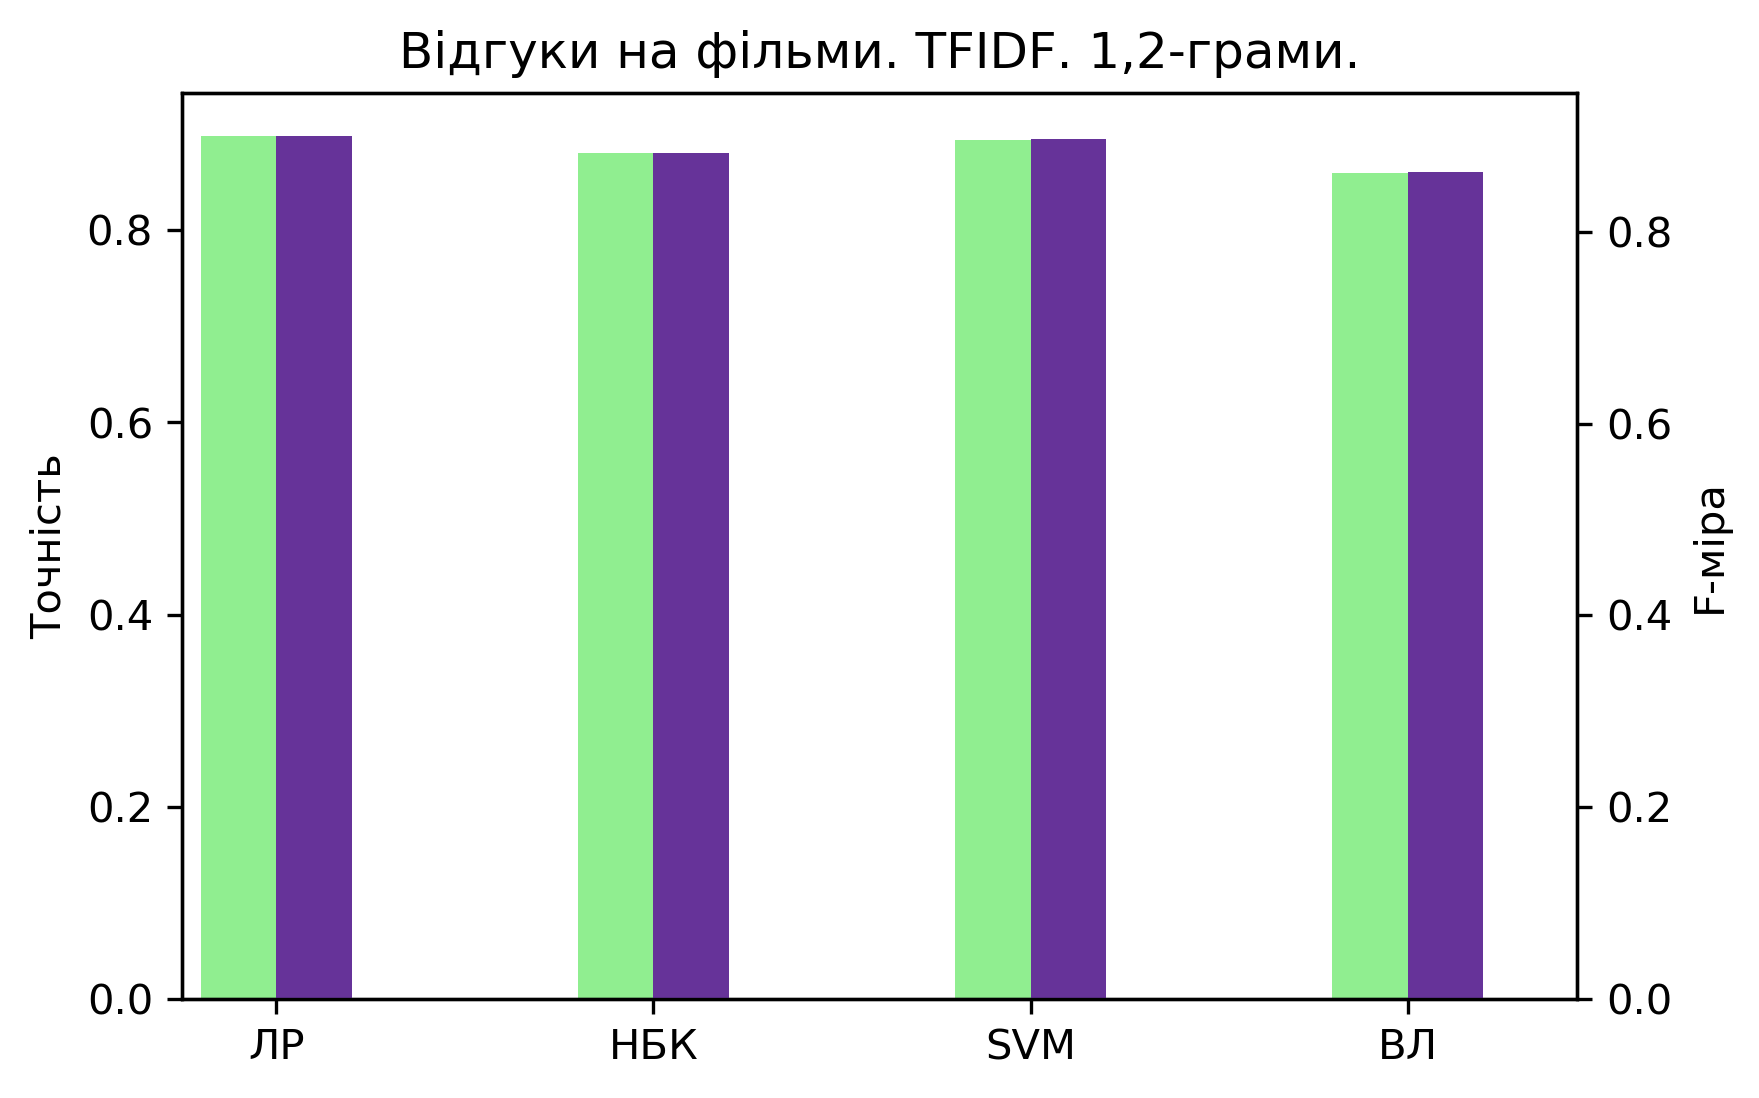

In [125]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
ax2 = ax.twinx() 

width = 0.2

df_1.accuracy.plot(kind='bar', color='lightgreen', ax=ax, width=width, position=1)
df_1.f1score.plot(kind='bar', color='rebeccapurple', ax=ax2, width=width, position=0)
ax.set_ylabel('Точність')
ax2.set_ylabel('F-міра')
ax.set_xticklabels(df_1['model'])
ax.xaxis.set_tick_params(rotation=0)
ax.set_title("Відгуки на фільми. TFIDF. 1,2-грами.")
plt.savefig("review.png", dpi=300, quality=100)